In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats

## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

FileNotFoundError: [Errno 2] File b'/kaggle/input/house-prices-advanced-regression-techniques/train.csv' does not exist: b'/kaggle/input/house-prices-advanced-regression-techniques/train.csv'

In [ ]:
#train= train.fillna(train.mean())
#test= test.fillna(test.mean())
train.head()


In [ ]:
## 1 -step make the list of features which has missing values

features_with_na=[features for features in train.columns if train[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing values')

In [ ]:
train.info()


In [336]:
train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



 mu = 180921.20 and sigma = 79415.29



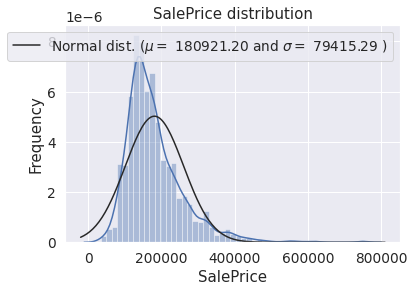

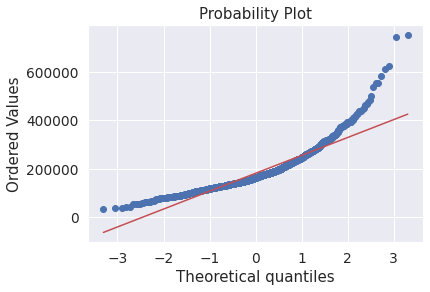

In [337]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show() 

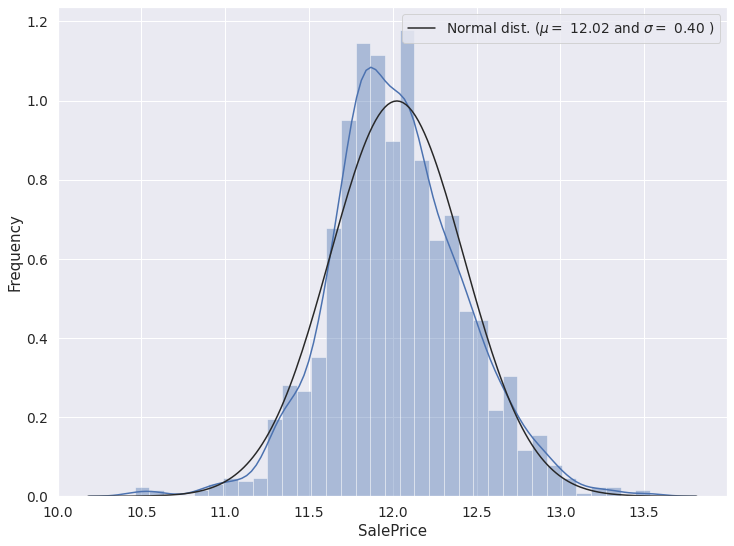

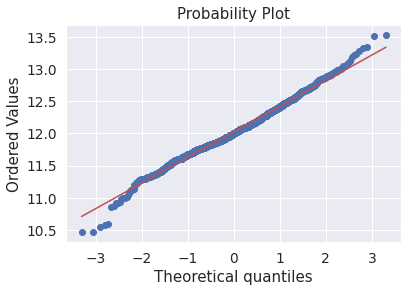

In [338]:
train['SalePrice'] = np.log1p(train['SalePrice'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

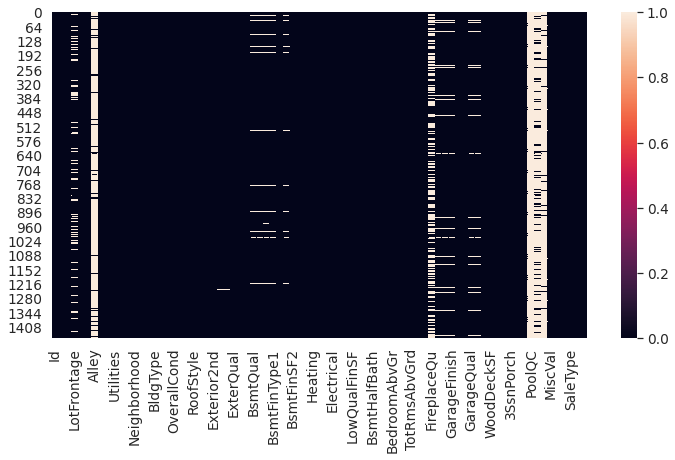

In [339]:
#plot of missing value attributes
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull())
plt.show()

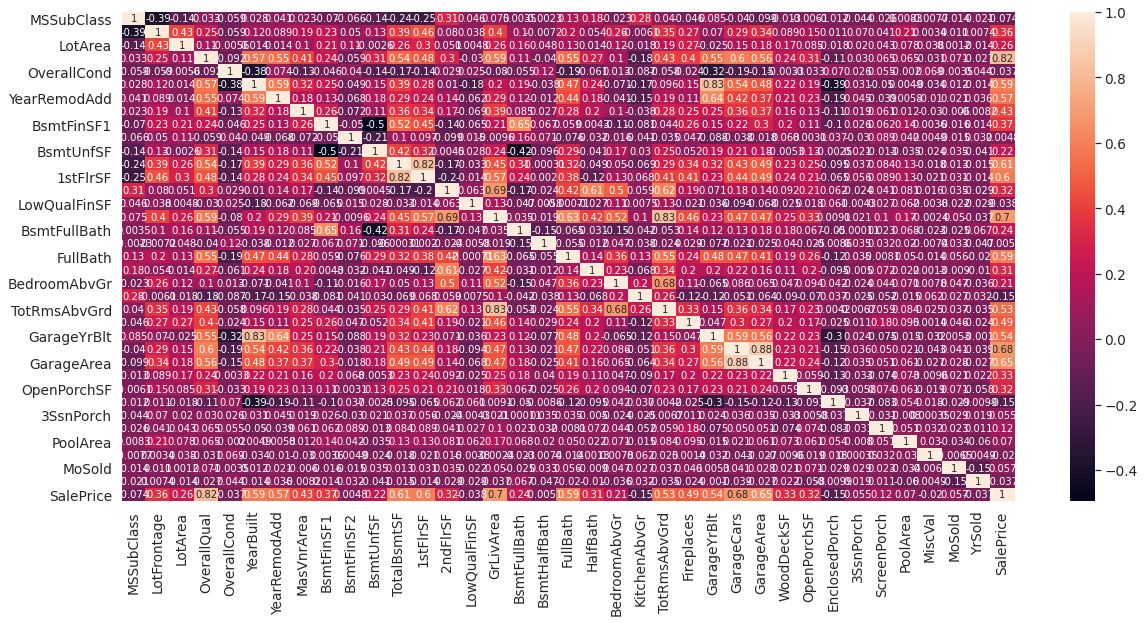

In [340]:
train_corr = train.select_dtypes(include=[np.number])
del train_corr['Id']

#Coralation plot
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

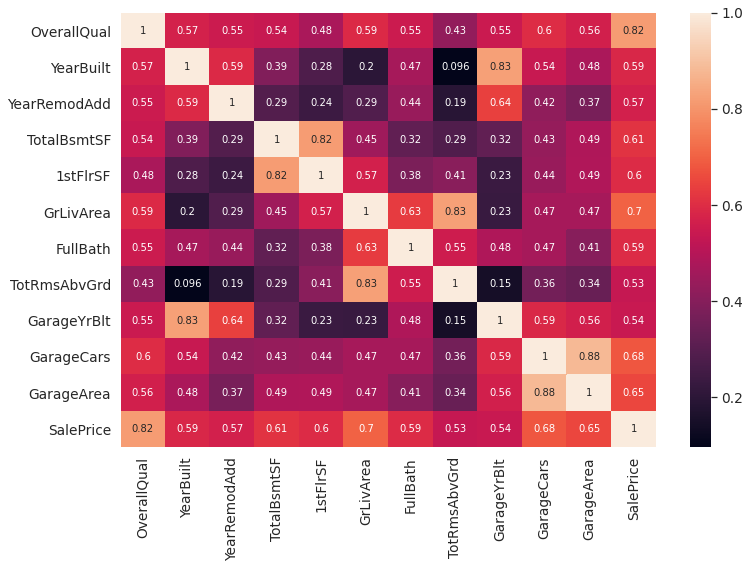

In [341]:
##Top 50% Corralation train attributes with sale-price¶
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

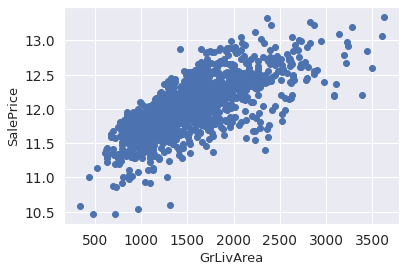

In [342]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) ].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [343]:
#missing value
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max() 

0

In [344]:
train.isnull().sum()


Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 63, dtype: int64

In [345]:
#outliers
train.sort_values(by = 'GrLivArea', ascending = False)[:2]
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

In [346]:
##PREPROCESSING
train = train[train.SalePrice<450000]

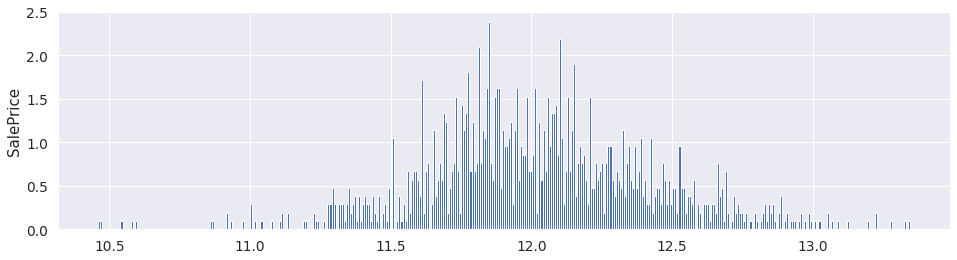

In [347]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0

x =train['SalePrice']
plt.hist(x, density=True, bins=400)
plt.ylabel('SalePrice');

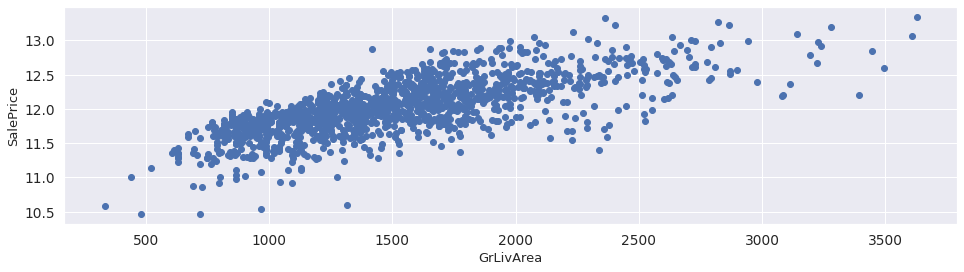

In [348]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

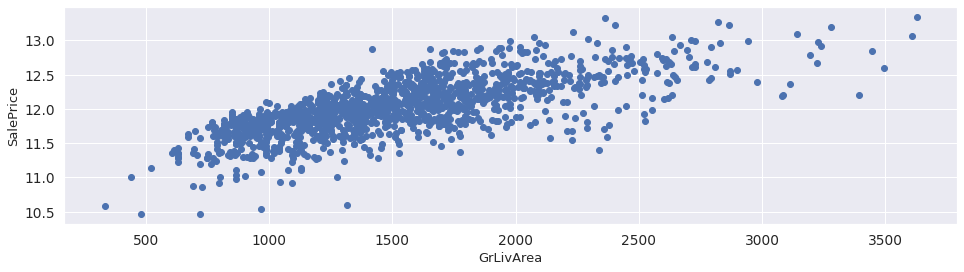

In [349]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) ].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

FEATURE SELECTION****

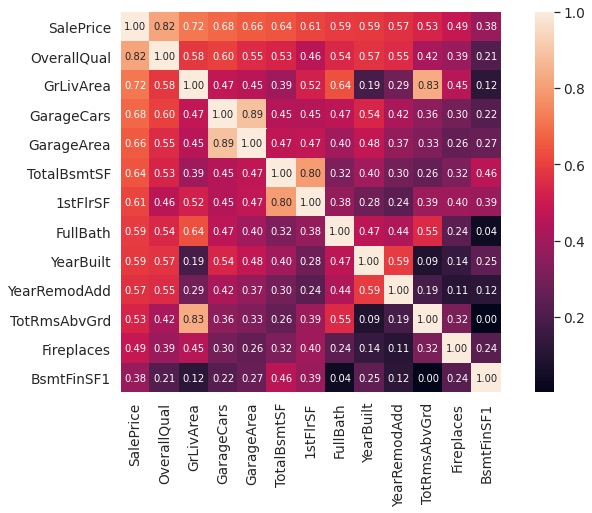

In [350]:
#saleprice correlation matrix
k = 13 #number of variables for heatmap
plt.figure(figsize=(12,7))
corrmat = train.corr()
# picking the top 13 correlated features
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [351]:
train = train[cols]
test= test[cols.drop(['SalePrice'])]
test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,BsmtFinSF1
0,5,896,1.0,730.0,882.0,896,1,1961,1961,5,0,468.0
1,6,1329,1.0,312.0,1329.0,1329,1,1958,1958,6,0,923.0
2,5,1629,2.0,482.0,928.0,928,2,1997,1998,6,1,791.0
3,6,1604,2.0,470.0,926.0,926,2,1998,1998,7,1,602.0
4,8,1280,2.0,506.0,1280.0,1280,2,1992,1992,5,0,263.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,0.0,546.0,546,1,1970,1970,5,0,0.0
1455,4,1092,1.0,286.0,546.0,546,1,1970,1970,6,0,252.0
1456,5,1224,2.0,576.0,1224.0,1224,1,1960,1996,7,1,1224.0
1457,5,970,0.0,0.0,912.0,970,1,1992,1992,6,0,337.0


In [352]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.2)

**##Linear Regression**

In [353]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [354]:
#Fit the model
# we are going to scale to data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [355]:
model.fit(X_train,y_train)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [356]:
predictions = model.predict(X_test)
predictions= predictions.reshape(-1,1)

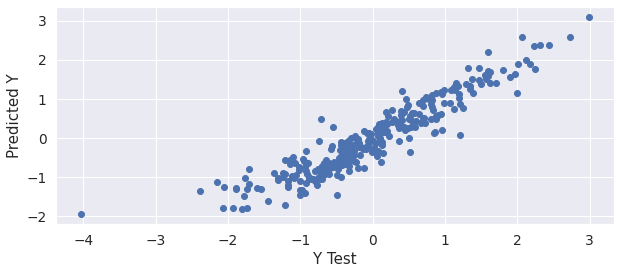

In [357]:
plt.figure(figsize=(10,4))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

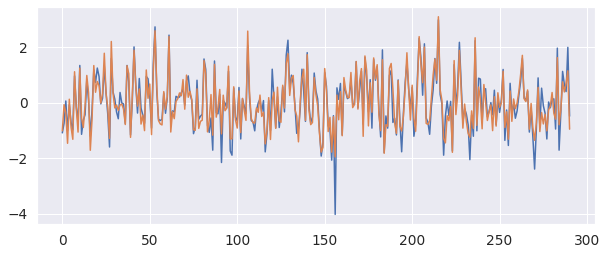

In [358]:
plt.figure(figsize=(10,4))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.show()

In [359]:
from sklearn import metrics

In [360]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2642574315810764
MSE: 0.12710312926482986
RMSE: 0.3565152581094249


In [361]:
print("Accuracy: ", model.score(X_test, y_test)*100)


Accuracy:  87.289687073517


In [362]:
test.isnull().sum().sort_values(ascending=False)

BsmtFinSF1      1
TotalBsmtSF     1
GarageArea      1
GarageCars      1
Fireplaces      0
TotRmsAbvGrd    0
YearRemodAdd    0
YearBuilt       0
FullBath        0
1stFlrSF        0
GrLivArea       0
OverallQual     0
dtype: int64

In [363]:
test.info


<bound method DataFrame.info of       OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0               5        896         1.0       730.0        882.0       896   
1               6       1329         1.0       312.0       1329.0      1329   
2               5       1629         2.0       482.0        928.0       928   
3               6       1604         2.0       470.0        926.0       926   
4               8       1280         2.0       506.0       1280.0      1280   
...           ...        ...         ...         ...          ...       ...   
1454            4       1092         0.0         0.0        546.0       546   
1455            4       1092         1.0       286.0        546.0       546   
1456            5       1224         2.0       576.0       1224.0      1224   
1457            5        970         0.0         0.0        912.0       970   
1458            7       2000         3.0       650.0        996.0       996   

      FullBath  Yea

In [364]:
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data.head(7)

,Total,Percent
BsmtFinSF1,1,0.000685
TotalBsmtSF,1,0.000685
GarageArea,1,0.000685
GarageCars,1,0.000685
Fireplaces,0,0.000000
TotRmsAbvGrd,0,0.000000
YearRemodAdd,0,0.000000


In [365]:
test = test.drop((missing_data[missing_data['Total'] > 78]).index,1)

In [366]:
test.isnull().sum().sort_values(ascending=False).head(7)

BsmtFinSF1      1
TotalBsmtSF     1
GarageArea      1
GarageCars      1
Fireplaces      0
TotRmsAbvGrd    0
YearRemodAdd    0
dtype: int64

In [367]:
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [368]:
def mostCommon(columnName):
    if test[columnName].value_counts().index[0] == 'None':
        return test[columnName].value_counts().index[1]
    else:
        return test[columnName].value_counts().index[0]

In [369]:
test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd,Fireplaces,BsmtFinSF1
0,5,896,1.0,730.0,882.0,896,1,1961,1961,5,0,468.0
1,6,1329,1.0,312.0,1329.0,1329,1,1958,1958,6,0,923.0
2,5,1629,2.0,482.0,928.0,928,2,1997,1998,6,1,791.0
3,6,1604,2.0,470.0,926.0,926,2,1998,1998,7,1,602.0
4,8,1280,2.0,506.0,1280.0,1280,2,1992,1992,5,0,263.0


In [371]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
cols=cols.drop(['SalePrice'])
               
for item in cols:
    print(item)
    if (is_string_dtype(test[item])):
        test[item]=test[item].fillna(mostCommon(item))
    elif (is_numeric_dtype(test[item])):
        test[item]=test[item].fillna(test[item].mean())
    
        

#test['Alley'] = test['Alley'].fillna(mostCommon('Alley'))


#test = test.drop(['Utilities'], axis=1)

OverallQual
GrLivArea
GarageCars
GarageArea
TotalBsmtSF
1stFlrSF
FullBath
YearBuilt
YearRemodAdd
TotRmsAbvGrd
Fireplaces
BsmtFinSF1


In [372]:
test_id = test_df['Id']
test_df = pd.DataFrame(test_id, columns=['Id'])

In [373]:
test_df

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [374]:
test = sc_X.fit_transform(test)

In [375]:
test

array([[-0.75110125, -1.21558782, -0.98801273, ..., -0.91833473,
        -0.89805519,  0.0632947 ],
       [-0.05487716, -0.32353941, -0.98801273, ..., -0.25537067,
        -0.89805519,  1.06339164],
       [-0.75110125,  0.29450799,  0.30162251, ..., -0.25537067,
         0.64706571,  0.77325363],
       ...,
       [-0.75110125, -0.539856  ,  0.30162251, ...,  0.4075934 ,
         0.64706571,  1.72499424],
       [-0.75110125, -1.06313613, -2.27764797, ..., -0.25537067,
        -0.89805519, -0.2246453 ],
       [ 0.64134693,  1.0588266 ,  1.59125775, ...,  1.73352152,
         0.64706571,  0.70071913]])

In [377]:
test_prediction=model.predict(test)
test_prediction= test_prediction.reshape(-1,1)


In [378]:
test_prediction = pd.DataFrame(test_prediction, columns=['SalePrice'])

In [379]:
test_prediction.head()

,SalePrice
0,-0.853136
1,-0.311892
2,0.182974
3,0.330094
4,0.331441


In [380]:
result = pd.concat([test_df,test_prediction], axis=1)

In [381]:
result.head()

,Id,SalePrice
0,1461,-0.853136
1,1462,-0.311892
2,1463,0.182974
3,1464,0.330094
4,1465,0.331441


In [ ]:
result.to_csv('submission.csv',index=False)